### **Improtation des bibliothèques**

In [1]:
#Importation des bibliothèques
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import datetime
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
#S'assurer de m'être à jour les bibliothèques
#Pour executer cette cellules, enlevez les commentaires "#"

# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader

# **1) Importation des données depuis Yahoo Finance**

In [3]:
#Saisir et formater la date d'aujourd'hui sous le format Jour/Mois/Année
now = datetime.now()
today = now.strftime("%d/%m/%Y")
today

'28/04/2022'

In [4]:
#Saisie de l'action chosie, et lecture de l'historique du cours de l'action depuis Yahoo Finance
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL',data_source='yahoo' , start=start, end=today )
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606


# **2) Préparation et visualisation des données**

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606


In [6]:
#Remplacer les indices
df =df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606


In [7]:
#Supprimer les colonnes "Date" et "Adjusted Close" (cours de clôture ajusté)
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


In [8]:
#Description statistique des colonnes numériques
df.describe()

,High,Low,Open,Close,Volume
count,3102.000000,3102.000000,3102.000000,3102.000000,3.102000e+03
mean,46.457762,45.486267,45.969099,45.991128,2.655996e+08
std,43.062823,42.045345,42.546263,42.575985,2.248130e+08
min,7.000000,6.794643,6.870357,6.858929,4.100000e+07
25%,18.839196,18.501786,18.647321,18.674464,1.068087e+08
50%,29.047500,28.450001,28.770000,28.760000,1.784564e+08
75%,51.322499,50.544999,50.858127,50.959375,3.613785e+08
max,182.940002,179.119995,182.630005,182.009995,1.880998e+09


### **Visualisation**

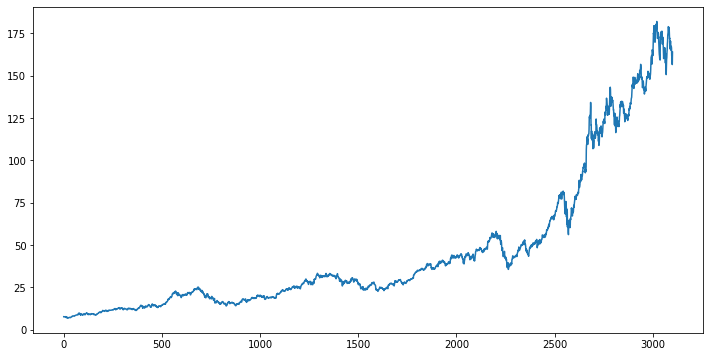

In [9]:
#Courbe de la variation du Prix de clôture en fonction du temps
plt.figure(figsize=(12,6))
plt.plot(df.Close)

In [10]:
#Préparation des données de moyenne mobile à 100 jours (Moving Average)
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3097    169.4848
3098    169.4606
3099    169.3809
3100    169.3090
3101    169.3295
Name: Close, Length: 3102, dtype: float64

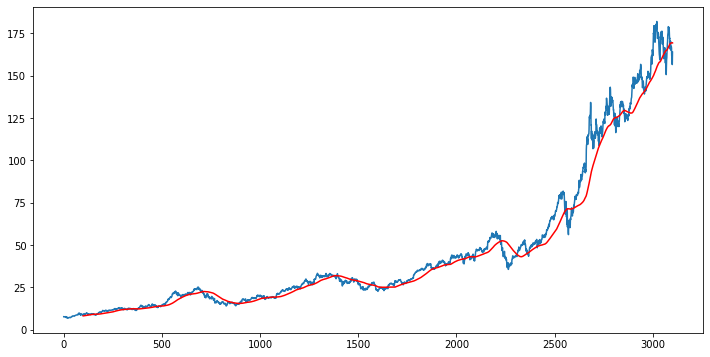

In [11]:
#Visualisation de la courbe de la moyenne mobile à 100 jours et du prix de clôture en fonction du temps
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
#Préparation des données de moyenne mobile à 200 jours (Moving Average)
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3097    158.97300
3098    159.06185
3099    159.12335
3100    159.17800
3101    159.25170
Name: Close, Length: 3102, dtype: float64

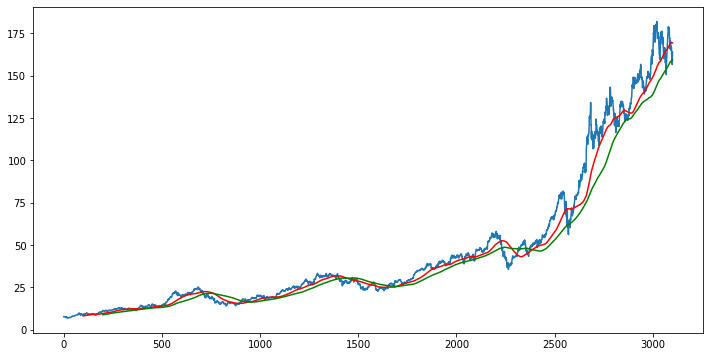

In [13]:
#Visualisation de la courbe de la moyenne mobile à 100 et 200 jours et du prix de clôture en fonction du temps
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

# **3) Division des données**

## **a) Division des données en Traing Set et Testing Set**

In [14]:
#Division des données en Training Data (70%) et Testing Data (30%)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2171, 1)
(931, 1)


In [15]:
data_training.tail()

,Close
2166,51.882500
2167,52.217499
2168,52.437500
2169,52.560001
2170,53.330002


In [16]:
data_testing.head()

,Close
2171,54.395000
2172,53.865002
2173,53.759998
2174,53.762501
2175,53.872501


In [17]:
#Scaling de la Traing Data et transformation en matrice
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

In [18]:
data_training_array

array([[0.01687684],
       [0.01716121],
       [0.01454053],
       ...,
       [0.98079446],
       [0.98343054],
       [1.        ]])

## **b) Division des données en x_train, y_train et x_test, y_test**

### **Train Set : x_train et y_train**

In [19]:
#Voir le shape du Training Data initial 
print(data_training_array.shape)

(2171, 1)


In [20]:
#Division de x_train et y_train par pas de 100 jours 

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 : i ])
  y_train.append(data_training_array[i, 0])

In [21]:
#Conversion de x_train et y_train en matrices
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
print(x_train.shape)
print(y_train.shape)

(2071, 100, 1)
(2071,)


### **Testing Set : x_test et y_test**

In [23]:
data_training.tail()

,Close
2166,51.882500
2167,52.217499
2168,52.437500
2169,52.560001
2170,53.330002


In [24]:
data_testing.head(5)

,Close
2171,54.395000
2172,53.865002
2173,53.759998
2174,53.762501
2175,53.872501


In [25]:
#Charger les 100 dernières lignes du Training Set pour les ajouter au (début) Testing Set

past_100_days = data_training.tail(100)

In [26]:
#Ajouter les 100 dernières lignes aux Data Frame final du Testing

data_testing = past_100_days.append(data_testing, ignore_index=True)
data_testing

,Close
0,42.084999
1,41.619999
2,41.945000
3,41.669998
4,42.097500
...,...
1026,161.789993
1027,162.880005
1028,156.800003
1029,156.570007


In [27]:
#Scaling pour changer l'échelle du Testing Set à [0-1]
data_testing_array = scaler.fit_transform(data_testing)
data_testing_array.shape

(1031, 1)

In [28]:
#Diviser le testing set en x_test et y_test
x_test = []
y_test = []

for i in range(100, data_testing_array.shape[0]):
  x_test.append(data_training_array[i-100 : i ])
  y_test.append(data_training_array[i, 0])

In [29]:
#Conversion de x_test et y_test en matrices
x_test, y_test = np.array(x_test), np.array(y_test)

In [30]:
print(x_test.shape)
print(y_test.shape)

(931, 100, 1)
(931,)


# **4) Création du modèle LSTM**

In [31]:
#Création du modèle

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
#Compilation et training du modèle

model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
65/65 [==============================] - 20s 242ms/step - loss: 0.0253
Epoch 2/50
65/65 [==============================] - 16s 251ms/step - loss: 0.0066
Epoch 3/50
65/65 [==============================] - 17s 259ms/step - loss: 0.0055
Epoch 4/50
65/65 [==============================] - 16s 247ms/step - loss: 0.0051
Epoch 5/50
65/65 [==============================] - 21s 319ms/step - loss: 0.0045
Epoch 6/50
65/65 [==============================] - 20s 307ms/step - loss: 0.0045
Epoch 7/50
65/65 [==============================] - 16s 245ms/step - loss: 0.0044
Epoch 8/50
65/65 [==============================] - 23s 354ms/step - loss: 0.0043
Epoch 9/50
65/65 [==============================] - 22s 333ms/step - loss: 0.0046
Epoch 10/50
65/65 [==============================] - 18s 274ms/step - loss: 0.0038
Epoch 11/50
65/65 [==============================] - 25s 390ms/step - loss: 0.0036
Epoch 12/50
65/65 [==============================] - 16s 247ms/step - loss: 0.0036
Epoch 13/50
6

## **Enregistrement du modèle**

In [34]:
#Enregistrement du modèle
model.save('keras_model.h5')

# **6) Evaluation du modèle**

In [35]:
print(x_test.shape)
print(y_test.shape)

(931, 100, 1)
(931,)


In [36]:
#Prédictions pour x_test

y_pred = model.predict(x_test)
y_pred.shape

(931, 1)

In [37]:
#Récuperer le facteur de scaling
scaler.scale_

array([0.00682769])

In [38]:
#Annuler le scaling 

scale_factor = 1 / scaler.scale_
y_pred = y_pred * scale_factor
y_testing = y_test * scale_factor

In [68]:
y_pred[-1], y_testing[-1]

(array([43.37465789]), 36.0711090074503)

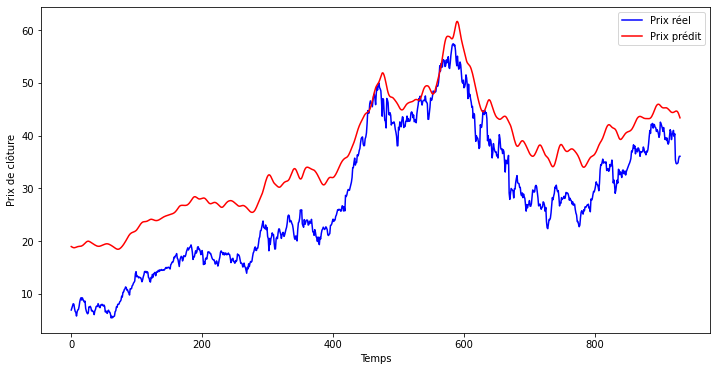

In [41]:
#Visionner la courbe des prédiction du cours de clôture VS le cours du prix de clôture réels

plt.figure(figsize=(12,6))
plt.plot(y_testing, 'b', label = 'Prix réel')
plt.plot(y_pred, 'r', label='Prix prédit')
plt.xlabel('Temps')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

In [86]:
#Prédiction du prix de clôture pour demain 
x = []
x.append(y_test[-100:])
x = np.array(x)
x.shape

(1, 100)

In [87]:
pred_tomorrow = model.predict(x)
pred_tomorrow.shape

(1, 1)

In [88]:
pred_tomorrow = pred_tomorrow * scale_factor
print("Le prix de clôture pour aujourd'hui est :",y_testing[-1],"\nLe prix de clôture prédit pour demain est : ", float(pred_tomorrow))

Le prix de clôture pour aujourd'hui est : 36.0711090074503 
Le prix de clôture prédit pour demain est :  43.019004008429874
